In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, recall_score,f1_score,precision_recall_curve

In [6]:
# Reading the csv file using pandas dataframe:
df=pd.read_csv(r"C:\Users\sattw\Downloads\card_transdata.csv")
df.head() #displaying the first few rows of dataframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.tail() #displaying the last few rows of dataframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [4]:
#information of the data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [36]:
df.mean()

distance_from_home                26.628792
distance_from_last_transaction     5.036519
ratio_to_median_purchase_price     1.824182
repeat_retailer                    0.881536
used_chip                          0.350399
used_pin_number                    0.100608
online_order                       0.650552
fraud                              0.087403
dtype: float64

In [37]:
df.median()

distance_from_home                9.967760
distance_from_last_transaction    0.998650
ratio_to_median_purchase_price    0.997717
repeat_retailer                   1.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      1.000000
fraud                             0.000000
dtype: float64

<AxesSubplot:title={'center':'Boxplot with seaborn'}>

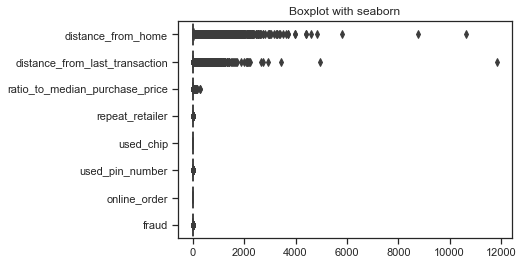

In [44]:
plt.title('Boxplot with seaborn')
sns.set(style='ticks',palette='muted')
sns.boxplot(data=df,orient="h")

In [5]:
df.size

8000000

In [6]:
df.shape

(1000000, 8)

In [7]:
df.ndim

2

In [8]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
#distribution of legit transactions and fraudulent transactions
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [10]:
#separating the data for analysis
normal=df[df.fraud==0]
fraudulent=df[df.fraud==1]

In [11]:
print(normal.shape)
print(fraudulent.shape)

(912597, 8)
(87403, 8)


In [12]:
normal.ratio_to_median_purchase_price.describe()

count    912597.000000
mean          1.423642
std           1.946152
min           0.004399
25%           0.449768
50%           0.913950
75%           1.788918
max         267.802942
Name: ratio_to_median_purchase_price, dtype: float64

In [13]:
fraudulent.ratio_to_median_purchase_price.describe()

count    87403.000000
mean         6.006323
std          5.564320
min          0.011966
25%          3.500270
50%          5.071294
75%          7.331222
max        266.689692
Name: ratio_to_median_purchase_price, dtype: float64

In [14]:
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


In [15]:
normal_sample=normal.sample(n=87403)#since no of fraud transactions=87403

In [16]:
new_df=pd.concat([normal_sample,fraudulent],axis=0) #0 means rows,1 means columns

In [17]:
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
921393,24.473305,0.939879,1.316258,1.0,0.0,0.0,0.0,0.0
329148,149.694812,0.216318,0.698269,1.0,0.0,0.0,0.0,0.0
738442,11.698781,0.155514,1.335549,1.0,0.0,1.0,1.0,0.0
456057,5.679267,0.350246,2.760978,1.0,0.0,0.0,1.0,0.0
88589,73.935436,0.178441,2.811099,1.0,0.0,0.0,1.0,0.0


In [18]:
new_df['fraud'].value_counts()

0.0    87403
1.0    87403
Name: fraud, dtype: int64

In [19]:
new_df.groupby('fraud').mean()
# The values are almost same,this tells us that the nature of the dataset is not changed even after undersampling

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,23.034816,4.543071,1.434699,0.883505,0.360697,0.109138,0.622210
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


Splitting the dataset into features and targets

In [20]:
x=new_df.drop(columns='fraud',axis=1)
y=new_df['fraud']

In [21]:
print(x)

        distance_from_home  distance_from_last_transaction  \
921393           24.473305                        0.939879   
329148          149.694812                        0.216318   
738442           11.698781                        0.155514   
456057            5.679267                        0.350246   
88589            73.935436                        0.178441   
...                    ...                             ...   
999908           45.296658                        0.882736   
999916          167.139756                        0.282253   
999919          124.640118                        0.004416   
999939           51.412900                        3.429330   
999949           15.724799                        1.875906   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
921393                        1.316258              1.0        0.0   
329148                        0.698269              1.0        0.0   
738442                        1.335549       

In [22]:
print(y)

921393    0.0
329148    0.0
738442    0.0
456057    0.0
88589     0.0
         ... 
999908    1.0
999916    1.0
999919    1.0
999939    1.0
999949    1.0
Name: fraud, Length: 174806, dtype: float64


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
#20% data will be used as test data
#stratify is used to make the data balanced in both testing data and training data
print( x.shape,x_train.shape,x_test.shape)

(174806, 7) (139844, 7) (34962, 7)


Training the model using Logistic Regression

In [29]:
model= LogisticRegression(solver='lbfgs',max_iter=1000)

In [30]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Accuracy score

In [31]:
#Accuracy of training data
x_train_prediction=model.predict(x_train)
training_accuracy=accuracy_score(x_train_prediction,y_train)

In [32]:
print(training_accuracy)

0.9395683761906124


In [66]:
#Accuracy of testing data
x_test_prediction=model.predict(x_test)
testing_accuracy=accuracy_score(x_test_prediction,y_test)

In [34]:
print(testing_accuracy) # Testing data accuracy is almost the same as training data accuracy

0.9387048795835479


In [54]:
 confusion = confusion_matrix(x_test_prediction, y_test)
 confusion.ravel() 


array([16258,   920,  1223, 16561], dtype=int64)

In [53]:
precision_positive = precision_score(x_test_prediction,y_test, pos_label=1)
precision_negative = precision_score(x_test_prediction,y_test, pos_label=0)
precision_positive, precision_negative 


(0.9473714318402837, 0.930038327326812)

In [57]:
recall_sensitivity = recall_score( x_test_prediction,y_test,pos_label=1)
recall_specificity = recall_score(x_test_prediction,y_test, pos_label=0)
recall_sensitivity, recall_specificity
#The best value of recall is 1 and the worst value is 0. 

(0.9312303193882141, 0.9464431249272325)

In [60]:
 f1_positive = f1_score(x_test_prediction,y_test,pos_label=1)
 f1_negative = f1_score(x_test_prediction,y_test, pos_label=0)
 f1_positive, f1_negative 


(0.9392315326811286, 0.9381690181482443)

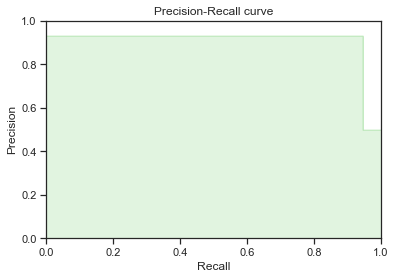

In [62]:
precision, recall, _ = precision_recall_curve(y_test, x_test_prediction)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

In [7]:
df_new=df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]

In [8]:
df_new.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940
1,10.829943,0.175592,1.294219
2,5.091079,0.805153,0.427715
3,2.247564,5.600044,0.362663
4,44.190936,0.566486,2.222767


In [9]:
df_new.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
distance_from_home,1.000000,0.000193,-0.001374
distance_from_last_transaction,0.000193,1.000000,0.001013
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000


<AxesSubplot:>

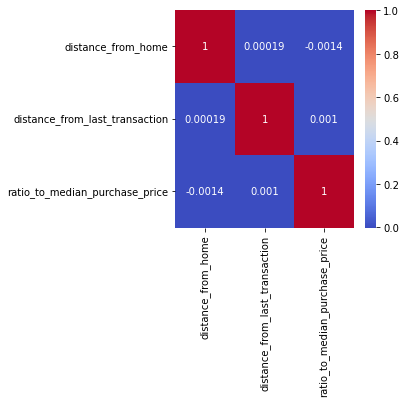

In [11]:
plt.figure(figsize=(4,4))
sns.heatmap(df_new.corr(),annot=True,cmap="coolwarm")